<a href="https://github.com/XuHongCN"><img src = "https://raw.githubusercontent.com/XuHongCN/Docs.Public/master/photos/DS-Notebook.png" width = 400> </a>

# World Happiness Report Analysis
### EPFL Certificate of Open Studies (COS): Applied Data Science Program Project, Part 1
### Author: Hong Xu
#### 4th May 2020

### Preparation & Check
Make sure the jupyter notebook is running in the correct python environment

In [1]:
!which python  #path to python env
!which jupyter  #path to jupyter
!pwd                 #current working directory

/Users/HongX/anaconda3/envs/epfl/bin/python
/Users/HongX/anaconda3/envs/epfl/bin/jupyter
/Users/HongX/X.Codes/epfl.MLCert.ML


### Import Packages

In [2]:
#Install Packages if necessary
#!conda install wget --name epfl

In [3]:
import os
import sys
import wget
import zipfile as zp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sys.executable


Bad key "text.kerning_factor" on line 4 in
/Users/HongX/anaconda3/envs/py36quant/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


'/Users/HongX/anaconda3/envs/py36quant/bin/python'

## A. Importing, cleaning and numerical summaries
#### A.1 Download the data set data.csv from the Resources tab.

In [4]:
url = 'https://d7whxh71cqykp.cloudfront.net/uploads/resource/document/673/data.csv.zip'
wget.download(url)
zipPath = os.getcwd()+'/'+url.split('/')[-1]
csv = zp.ZipFile(zipPath)
csv.extractall()

#### A.2 Import the data as a pandas DataFrame.

In [5]:
df = pd.read_csv('data.csv')
df.head(5)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


#### A.3 Check the number of observations.

In [6]:
df.shape[0]

153

#### A.4 Obtain the column headings.

In [7]:
list(df.columns)

['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy',
 'Family',
 'Health',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia',
 'Job Satisfaction',
 'Region']

#### A.5 Check the data type for each column.

In [8]:
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

#### A.6 Check if there are any missing values.

In [9]:
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

#### A.7 If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

#### Note: Ukraine is droped in later analysis since it is not classfied clearly.

In [11]:
df.drop(df.loc[df['Country']=='Ukraine'].index, inplace=True)

#### A.8 Obtain the mean, minimum and maximum value for each column containing numerical data.

In [12]:
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,77.466667,5.366287,0.984490,1.189149,0.550626,0.411717,0.244746,0.123675,1.861846,75.229333
std,44.864848,1.131879,0.422301,0.286841,0.236898,0.148791,0.135673,0.102793,0.496559,13.003590
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.250000,4.519250,0.661444,1.042312,0.367188,0.307313,0.152324,0.057170,1.612865,68.775000
50%,77.500000,5.286000,1.066948,1.252872,0.609627,0.438880,0.229811,0.089565,1.833961,78.500000
75%,115.750000,6.103250,1.315027,1.419041,0.717596,0.519885,0.324529,0.152636,2.167007,85.150000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


#### A.9 List the 10 happiest countries, ordered by their happiness score.

In [13]:
df.sort_values(by=['Happiness Score'], ascending=False).head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


#### A.10 List the 10 least happy countries, ordered by their happiness score.

In [14]:
df_tail = df.sort_values(by=['Happiness Score'], ascending=False).tail(10)
df_tail.sort_values(by=['Happiness Score'], ascending=True)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America


## B. Indexing and grouping
#### B.1 Group the data points by region and save them into separate .csv files ex. a Western Europe.csv with all the data for countries in Western Europe and so on for the other 5 regions.

In [15]:
regions = df.groupby(['Region']).count().index.values
print(list(regions))

for region in regions:
    df_byRegion = df[df['Region'] == region]
    df_byRegion.to_csv(str(region) + '.csv')
    df_byRegion = df_byRegion.iloc[0:0]

!ls *.csv

['Africa', 'Asia-Pacific', 'Eastern Europe', 'Latin America', 'North America', 'Western Europe']
Africa.csv          Latin America.csv   North America.csv   iris.csv
Asia-Pacific.csv    Mountains 2.csv     Western Europe.csv  songs_requested.csv
Eastern Europe.csv  Mountains.csv       data.csv


#### B.2 Compute the mean happiness score for each region and rank the regions from most happy to least happy.

In [16]:
df.groupby(['Region']).mean().sort_values(by=['Happiness Score'], ascending=False)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,
North America,10.500000,7.154500,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505,2.202689,87.900000
Western Europe,20.000000,6.880474,1.471893,1.485298,0.820159,0.546660,0.311760,0.231367,2.013270,90.310526
Latin America,50.772727,5.957818,1.006981,1.290156,0.611009,0.449222,0.210696,0.087764,2.301928,81.104545
Eastern Europe,70.619048,5.498952,1.178098,1.281235,0.681838,0.311535,0.170583,0.050637,1.825065,77.628571
Asia-Pacific,78.325581,5.358326,1.059272,1.167791,0.608605,0.429932,0.294002,0.148947,1.649736,77.834884
Africa,122.116279,4.254581,0.563714,0.970837,0.266773,0.356791,0.211645,0.100776,1.784001,61.193023


#### B.3 Compute the number of countries in each region that have a happiness score above 6.0.

In [17]:
for region in regions:
    df_byRegion = df[df['Region'] == region]
    count_num = df_byRegion[df_byRegion['Happiness Score']>6].shape[0]
    print (region, count_num)

Africa 0
Asia-Pacific 11
Eastern Europe 1
Latin America 13
North America 2
Western Europe 17


#### B.4 Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [18]:
dict_scoreDiff = dict()
for region in regions:
    df_byRegion = df[df['Region'] == region]
    minVal = df_byRegion.describe().loc['min', 'Happiness Score']
    maxVal = df_byRegion.describe().loc['max', 'Happiness Score']
    dict_scoreDiff[region] = maxVal-minVal

print(dict_scoreDiff)

df_scoreDiff = pd.DataFrame.from_dict([dict_scoreDiff]).T
df_scoreDiff .columns = ['Happy Score Diff']
df_scoreDiff.sort_values(by=['Happy Score Diff'], ascending=False)

{'Africa': 3.179000139, 'Asia-Pacific': 3.852000237, 'Eastern Europe': 1.4539999969999995, 'Latin America': 3.4760000700000004, 'North America': 0.32299995400000014, 'Western Europe': 2.3420000069999993}


,Happy Score Diff
Asia-Pacific,3.852
Latin America,3.476
Africa,3.179
Western Europe,2.342
Eastern Europe,1.454
North America,0.323


### C. Bar plot of the Happiness Score
#### C.1 Obtain a horizontal bar plot of the Happiness Score of the top 10 happiest countries. Your bar chart should have the names of the countries are listed vertically along the y-axis and the x-axis should have labels for each number from 0 to 8. Ensure that the chart has an appropriate title and labels.

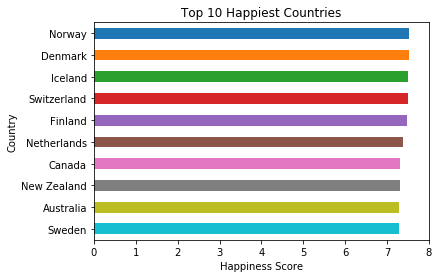

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe


In [19]:
#Get the Top 10 happy scores and sort it ascendingly
df_happyScore = df.sort_values(by=['Happiness Score'], ascending=False).head(10)
df_happyScore.set_index('Country', inplace=True)

#Get the value for happy score and plot the horizontal bar
values = df_happyScore[0:10]['Happiness Score']
fig, ax =plt.subplots()
colormap = plt.cm.tab10(range(0, len(values)))
ax = values.plot.barh(stacked=True, color=colormap)
ax.invert_yaxis()
ax.set_xlim(0, 8)
ax.set_xlabel('Happiness Score')
ax.set_title('Top 10 Happiest Countries')
plt.show()

df_happyScore.head(3)

#### C.2 You will now modify the horizontal bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:
* Economy  
* Family   
* Health 
* Freedom 
* Generosity 
* Corruption 
* Dystopia 

#### Choose a distinct color for each category and include an appropriate legend with your chart.

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia
Country,,,,,,,,
Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
Australia,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


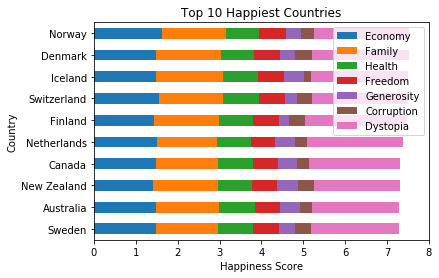

In [20]:
#Get the happy scores and sort it ascendingly
df_stack=df_happyScore[["Happiness Score", "Economy", "Family", "Health", "Freedom", "Generosity", "Corruption", "Dystopia"]]
df_stack.sort_values(by=['Happiness Score'], ascending=False)

#Take the 7 subcomponents for plotting
df_stack_tmp = df_stack[["Economy", "Family", "Health", "Freedom", "Generosity", "Corruption", "Dystopia"]]
df_stack_tmp.plot(kind='barh', stacked=True, xlim=(0, 8))
plt.gca().invert_yaxis()
plt.xlabel('Happiness Score')
plt.title('Top 10 Happiest Countries')

df_stack

#### C.3 Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa. 

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia
Country,,,,,,,,
Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
Mauritius,5.629,1.189396,1.209561,0.638007,0.491247,0.360934,0.042182,1.697584
Libya,5.525,1.101803,1.357564,0.520169,0.465733,0.152074,0.092610,1.835011
Morocco,5.235,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189
Somalia,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485
Nigeria,5.074,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391
South Africa,4.829,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909
Tunisia,4.805,1.007266,0.868351,0.613212,0.289681,0.049693,0.086723,1.890251
Egypt,4.735,0.989702,0.997471,0.520187,0.282110,0.128631,0.114381,1.702161


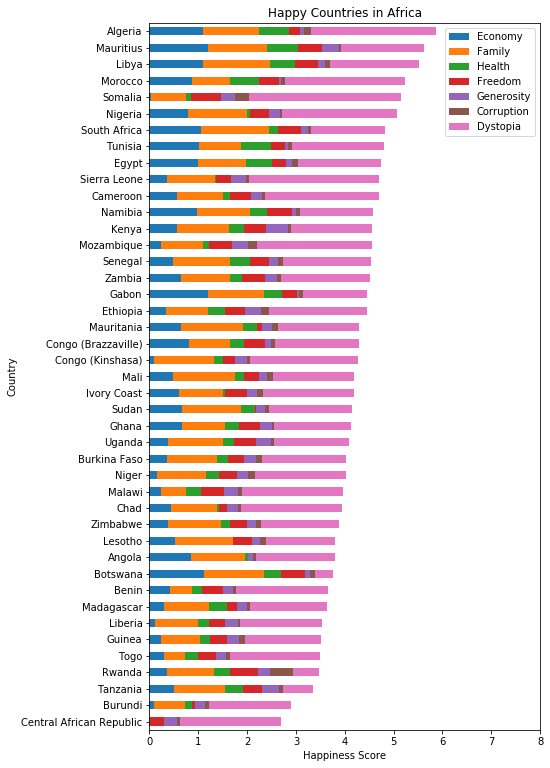

In [21]:
#Get the countries in the region of Africa
df_Africa=df[df['Region'] == 'Africa']
df_Africa.set_index('Country', inplace=True)

df_Africa_stack=df_Africa[["Happiness Score", "Economy", "Family", "Health", "Freedom", "Generosity", "Corruption", "Dystopia"]]
df_Africa_tmp = df_Africa_stack.sort_values(by=['Happiness Score'], ascending=False)
df_Africa_tmp2 = df_Africa_tmp[["Economy", "Family", "Health", "Freedom", "Generosity", "Corruption", "Dystopia"]]

#Start plotting the horizontal bar
df_Africa_tmp2.plot(kind='barh', stacked=True, xlim=(0, 8), figsize=(7,13))
plt.gca().invert_yaxis()
plt.xlabel('Happiness Score')
plt.title('Happy Countries in Africa')

df_Africa_tmp.head(10)

### D. Histogram of Job Satisfaction
#### D.1 Obtain a histogram of the Job Satisfaction using the following categories:
* 40%-50%
* 50%-60%
* 60%-70%
* 70%-80%
* 80%-90%
* 90%-100%

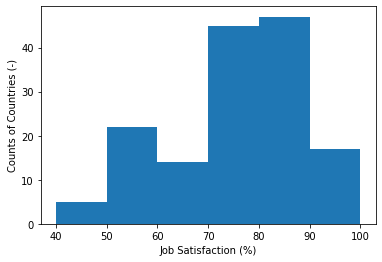

In [22]:
df_satis = df['Job Satisfaction']
df_satis.head(10)

plt.figure()
bins = [40, 50, 60, 70, 80, 90, 100]  #create the required bins

labels = ['Rabbits', 'Frogs']
plt.hist(df_satis, bins=bins, label=labels)
plt.xlabel('Job Satisfaction (%)')
plt.ylabel('Counts of Countries (-)')
plt.show()

### E. Pairwise Scatter plots
#### E.1 btain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as opposed to separate commands for each plot.

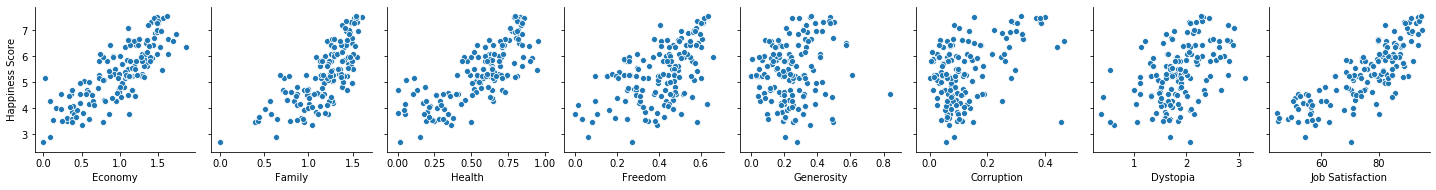

In [23]:
import seaborn as sns
sns.pairplot(data=df, y_vars=['Happiness Score'], x_vars=["Economy", "Family", "Health", "Freedom", "Generosity", "Corruption", "Dystopia", "Job Satisfaction"])

### F. Correlation
#### F.1 Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [24]:
#Get the correlation matrix
df_corr = df.corr(method='pearson')
df_corr

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Happiness Rank,1.000000,-0.992624,-0.811897,-0.744569,-0.781311,-0.543985,-0.144576,-0.410972,-0.481742,-0.816850
Happiness Score,-0.992624,1.000000,0.810597,0.759396,0.781817,0.562923,0.166226,0.434176,0.474464,0.814732
Economy,-0.811897,0.810597,1.000000,0.687814,0.839194,0.365685,-0.015353,0.358560,0.019965,0.700567
Family,-0.744569,0.759396,0.687814,1.000000,0.607224,0.427758,0.049973,0.242095,0.086792,0.625511
Health,-0.781311,0.781817,0.839194,0.607224,1.000000,0.346633,0.068773,0.288400,0.058212,0.705101
Freedom,-0.543985,0.562923,0.365685,0.427758,0.346633,1.000000,0.325823,0.496843,0.068176,0.504072
Generosity,-0.144576,0.166226,-0.015353,0.049973,0.068773,0.325823,1.000000,0.294547,-0.101583,0.220375
Corruption,-0.410972,0.434176,0.358560,0.242095,0.288400,0.496843,0.294547,1.000000,-0.029034,0.336794
Dystopia,-0.481742,0.474464,0.019965,0.086792,0.058212,0.068176,-0.101583,-0.029034,1.000000,0.282683
Job Satisfaction,-0.816850,0.814732,0.700567,0.625511,0.705101,0.504072,0.220375,0.336794,0.282683,1.000000


In [25]:
#Get the correlation column
df_corr = df_corr[['Happiness Score']]
df_corr.sort_values(by=['Happiness Score'], ascending=False)

,Happiness Score
Happiness Score,1.000000
Job Satisfaction,0.814732
Economy,0.810597
Health,0.781817
Family,0.759396
Freedom,0.562923
Dystopia,0.474464
Corruption,0.434176
Generosity,0.166226
Happiness Rank,-0.992624


#### So the <ins>Job Satisfaction</ins> has the highest correlation with the <ins>Happiness Score</ins>

### G. Probabilities
#### G1. Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

In [26]:
#Get how many countries have the happiness score above 6
df_score_greater_6 = df[df['Happiness Score'] > 6.0]
print (df_score_greater_6.shape)

#Get the dataframe for counting the counries by region within the listed countries with score above 6
count_score_greater_6 = df_score_greater_6.groupby(['Region']).count()[['Country']]
count_score_greater_6

(44, 12)


,Country
Region,
Asia-Pacific,11
Eastern Europe,1
Latin America,13
North America,2
Western Europe,17


In [27]:
#A event is from Western Europe
#B event is happiness score >6

#calculate the probability of  P(B)
p_score_greater_6 = df_score_greater_6.shape[0]/df.shape[0]

#calculate the probability of P(A∩B)
p_score_greater_6_and_WEU = count_score_greater_6.loc['Western Europe', 'Country']/df.shape[0]

#calculate the conditional probability of P(A/B)
p_final  = p_score_greater_6_and_WEU/p_score_greater_6

#The probability that randomly selected country with happniess score over 6.0 is from western europe
round(p_final, 3)

0.386

#### So the probability is 0.386

### H. Matrices
#### G1. Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [28]:
df_country_region = df[['Country', 'Region']]
df_country_region.head(10)

,Country,Region
0,Malta,Western Europe
1,Zimbabwe,Africa
2,Cyprus,Eastern Europe
3,Iran,Asia-Pacific
4,Mexico,Latin America
5,New Zealand,Asia-Pacific
6,Poland,Eastern Europe
7,Egypt,Africa
8,Senegal,Africa
9,Moldova,Eastern Europe


In [29]:
#Create the array for region
region_arr = np.array(['Africa', 'Asia-Pacific', 'Eastern Europe', 'Latin America', 'North America', 'Western Europe'])

In [30]:
#Create the array for country
country_arr  = np.vstack(df_country_region.loc[: , 'Country'])

In [31]:
#Initialize the matrix with dimension from region and country array
matrix_happy = np.zeros((len(country_arr), len(region_arr)))

for i in range(0, len(country_arr)):
    for j in range(0, len(region_arr)):
        
        #Check the corresponding region for the input country
        country_idx = df_country_region.loc[df_country_region['Country'] == country_arr[i][0]].index[0]
        region_check = df_country_region['Region'][country_idx]
        
        if region_arr[j] == region_check:
            matrix_happy[i,j] =1  
        else:
            matrix_happy[i,j] =0
            
matrix_happy

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0.

### END